### MHBF HW2
#### Leo & Andrey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from helper import gaussian_spectrum_1D

#### 1.1

In [2]:
def gen_signal(T: int, e: float) -> np.ndarray:
    """Function generates a random signal
    
    Function generates a random signal of length T and applies a filter to it
    in the frequency domain so that it has a Gaussian PSD with width e.
    """
    x = np.random.rand(T)
    x = gaussian_spectrum_1D(x, e)
    return x

def normalize(signal: np.ndarray) -> np.ndarray:
    """Function normalizes the signal so it has zero mean and unit variance"""
    signal -= np.mean(signal)
    signal /= np.sqrt(np.var(signal))
    return signal

#### 1.2
The smaller the width the lower the frequency, resulting in a function that changes more slowly.

In [3]:
x1 = normalize(gen_signal(T=1000, e=1/900));
x2 = normalize(gen_signal(T=1000, e=1/10000));


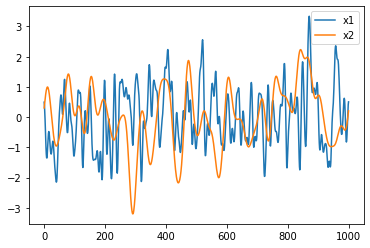

In [4]:
plt.plot(x1, label="x1")
plt.plot(x2, label="x2")
plt.legend();

#### 1.3

In [5]:
x = np.zeros((2,1000))
x[0,:] = x1
x[1,:] = x2

C = np.cov(x)
C_dot = np.cov(np.diff(x))

values, vectors = eig(C_dot, C)

vectors.T @ vectors # already normalized

array([[1.        , 0.10264163],
       [0.10264163, 1.        ]])

#### 1.4
The second vector has the smaller eigenvalue and as such should correspond to the slower signal (x2).  
From the eigenvectors we can see that the first vector is dominated by the first signal (x1), and the second vector is dominated by the second signal (x2). 

In [6]:
vectors

array([[-0.99625503, -0.01625048],
       [ 0.08646343,  0.99986795]])

In [7]:
values

array([0.04604522+0.j, 0.00522882+0.j])

In [8]:
y = vectors.T @ x

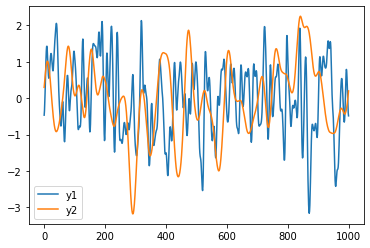

In [9]:
plt.plot(y[0,:], label="y1")
plt.plot(y[1,:], label="y2")
plt.legend();

#### 1.5
The longer the signal, the closer the absolute values of the first and last component are 1.  
This is because of 2 possible things. A longer signal can have slower components that couldn't exist in smaller ones.  
These components are kept after filtering and make the difference between the two signals more evident.  
The second is that since we are averaging over T when making the cov matrix, with longer T we get a more accurate covariance.

In [10]:
def vary_signal_length(Tmin: int, Tmax: int, steps: int) -> np.ndarray:
    """Function applies SFA to random signals of varying length
    
    Function generates two signals with a Gaussian PSD with widths 1/900 and 1/10000
    Sample length ranges logarithmically from Tmin to Tmax with steps steps
    Function returns an array with the resulting eigenvectors"""
    
    T = np.logspace(np.log10(Tmin), np.log10(Tmax), steps, dtype=int)
    vectors = np.zeros((steps,2,2))
    
    for i, t in enumerate(T):
        x = np.zeros((2,t))
        x[0,:] = normalize(gen_signal(T=t, e=1/900));
        x[1,:] = normalize(gen_signal(T=t, e=1/10000));
        C = np.cov(x)
        C_dot = np.cov(np.diff(x))

        l, vectors[i,:,:] = eig(C_dot, C)
        
    return vectors

def vector_plot(T: np.ndarray, vectors: np.ndarray) -> None:
    """Function plots the 4 vector components on a log scale"""
    fig = plt.figure(figsize=(20, 5))
    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1)
        ax.plot(T, vectors[:,i%2, i//2])
        ax.set_xscale('log')
        ax.set_ylabel('Component', fontsize=14)
        ax.set_xlabel('Signal length', fontsize=14);

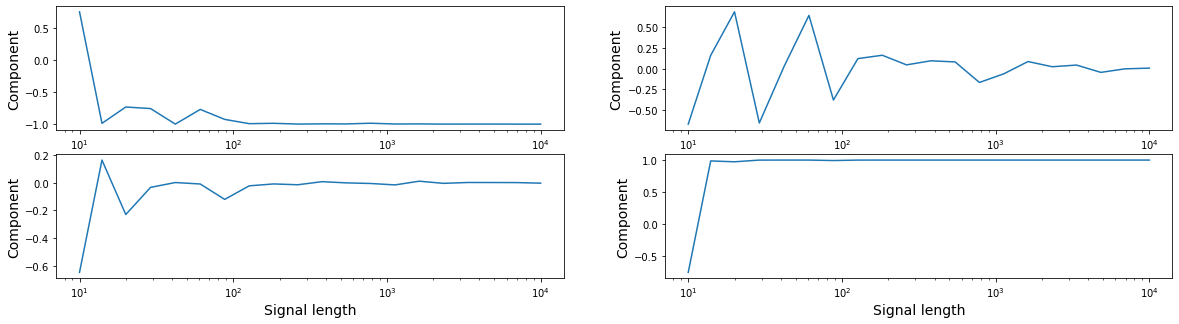

In [11]:
vectors = vary_signal_length(10, 10000, 20)


T =  np.logspace(1, 4, 20, dtype=int)
vector_plot(T, vectors)

#### 1.6
lambda1 / lambda2 is close to tau2^2 / tau1^2, with lambda being smaller the larger the tau.

#### 2.1

In [12]:
img = normalize(gen_signal(T=10000, e=0.04));
x = np.zeros((100,9900))

#### 2.2

In [13]:
for i in range(100):
    x[i,:] = img[i:9900+i] - np.mean(img[i:9900+i])

#### 2.3

In [14]:
C = np.cov(x)
C_dot = np.cov(np.diff(x))

values, vectors = eig(C_dot, C)

#### 2.4
The eigenvalues are given in ascending order -> first five eigenvalues are smallest

C:\Users\Polaris\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Eigenvalues')

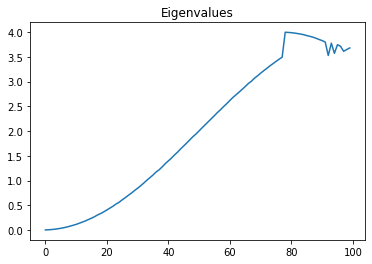

In [15]:
plt.plot(values);
plt.title("Eigenvalues")

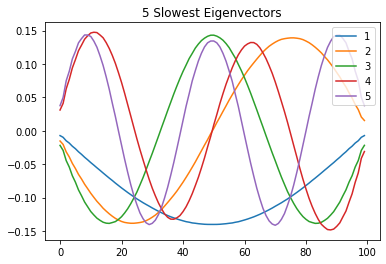

In [16]:
for i in range(5):
    plt.plot(vectors[:,i], label=str(i+1))
    plt.legend()
    plt.title("5 Slowest Eigenvectors")

#### 2.5
The eigenvectors look like sine functions with i equal to the number of half periods that fit into the receptive field.  
The eigenvectors with the smallest eigenvalues have the smallest periods -> they are the slowest. This is in line with the idea of SFA.  
On the edges of the receptive field the eigenvectors do not reach zero.  
This makes sense, as having zero values on the edges would be redundant and equivalent to the receptive field simply being two units smaller.  
In this way the eigenvectors maximize the use of the receptive field.  
When comparing to V1 receptive fields, the eigenvectors also have distinct on and off regions, however since the input is 1D they cannot have directional selectivity.

#### 2.6
Judging by the fact that these components change slowly over the 300 time steps I would say that the SFA succeeded.

In [17]:
y = vectors.T @ x

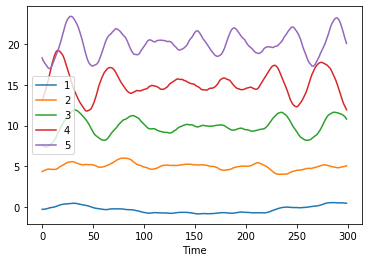

In [18]:
for i in range(5):
    plt.plot(y[i,0:300]+5*i, label=str(i+1))
    plt.legend()
    plt.xlabel("Time")